In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

failure_stresses = pd.DataFrame(
    [
        [2.247, 2.640, 2.842, 2.908, 3.099, 3.126, 3.245, 3.328, 3.355, 3.383, 3.572, 3.581, 3.681],
        [1.901, 2.132, 2.203, 2.228, 2.257, 2.35, 2.361, 2.396, 2.397, 2.445, 2.454, 2.454, 2.474],
        [1.312, 1.314, 1.479, 1.552, 1.700, 1.803, 1.861, 1.865, 1.944, 1.958, 1.966, 1.997, 2.006],
        [1.339, 1.434, 1.549, 1.574, 1.589, 1.613, 1.746, 1.753, 1.764, 1.807, 1.812, 1.840, 1.852],
    ],    
    index=pd.Series([1, 10, 20, 50], name='Length (mm)'))

In [2]:
with open('p2_data.tex', 'w') as f:
    f.write(failure_stresses.reset_index().to_latex(index=False))
failure_stresses

,0,1,2,3,4,5,6,7,8,9,10,11,12
Length (mm),,,,,,,,,,,,,
1,2.247,2.640,2.842,2.908,3.099,3.126,3.245,3.328,3.355,3.383,3.572,3.581,3.681
10,1.901,2.132,2.203,2.228,2.257,2.350,2.361,2.396,2.397,2.445,2.454,2.454,2.474
20,1.312,1.314,1.479,1.552,1.700,1.803,1.861,1.865,1.944,1.958,1.966,1.997,2.006
50,1.339,1.434,1.549,1.574,1.589,1.613,1.746,1.753,1.764,1.807,1.812,1.840,1.852


In [3]:
def fit_exponential_model(y):
    lambda_hat = 1/np.mean(y)
    return lambda_hat, np.square(lambda_hat/len(y))

In [4]:
def fit_exponential_model_as_dict(y):
    lambda_hat, lambda_hat_variance = fit_exponential_model(y)
    return {
        '$\\hat{\\lambda}$': lambda_hat,
        'Standard error': np.sqrt(lambda_hat_variance),
    }

failure_stresses_exponential_estimates = failure_stresses.apply(
    fit_exponential_model_as_dict, axis=1, result_type='expand')

with open('p2_exponential_estimates.tex', 'w') as f:
    f.write(failure_stresses_exponential_estimates.reset_index().to_latex(
        index=False, escape=False))
    
failure_stresses_exponential_estimates

,$\hat{\lambda}$,Standard error
Length (mm),,
1,0.317019,0.024386
10,0.432584,0.033276
20,0.571253,0.043943
50,0.599852,0.046142


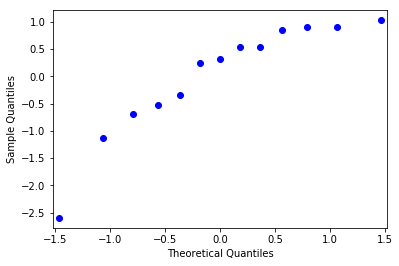

In [5]:
sm.qqplot(failure_stresses.loc[10], fit=stats.expon);

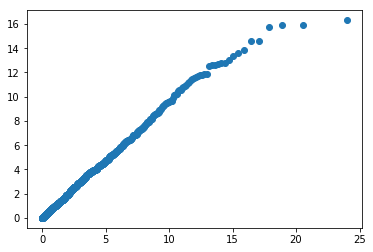

In [21]:
x = failure_stresses.loc[1]
x = stats.expon.rvs(scale=1/0.317019, size=1000)
theoretical_quantiles = stats.expon.ppf(np.linspace(start=0.5, stop=len(x) - 0.5, num=len(x))/len(x), scale=1/0.317019)
plt.plot(theoretical_quantiles, np.sort(x), 'o');

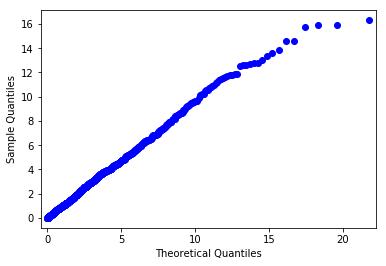

In [22]:
sm.qqplot(x, dist=stats.expon, loc=0, scale=1/0.317019);

In [16]:
stats.expon.fit(x)

(0.0003401704439788388, 3.2886255453876836)

In [87]:
np.mean(stats.expon.rvs(scale=1/0.317019, size=100000))

3.1479472556089343

In [74]:
np.mean(failure_stresses.loc[1])

3.1543846153846156

In [57]:
1/0.317019

3.1543850684028403